#utility NB for clustering lecture UI class 10
#FBB November 2015

In [1]:
__author__ = 'fbb'
%pylab inline
import numpy as np
import pylab as pl
#import kmseg
import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
import json
import os
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


#Clustering for compressing and dimensionality reduction


## meet Akuma @akumadog

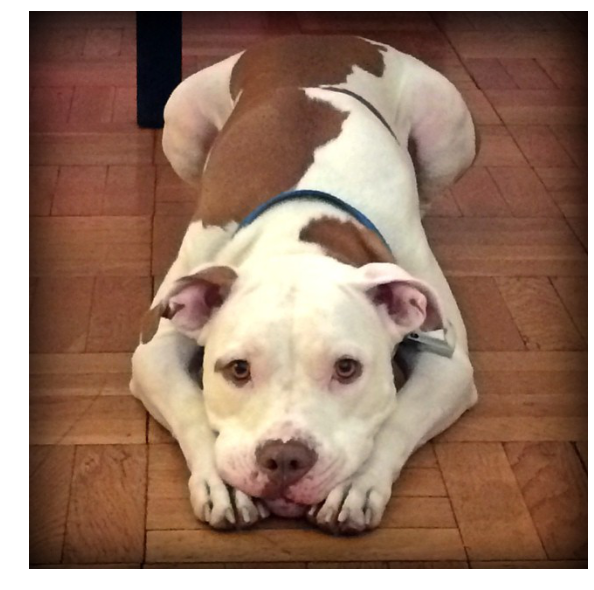

In [2]:
im = imread("10802534_761689917241346_821292660_n.jpg")
pl.figure(figsize=(10,10))
pl.imshow(im)
im.shape
red = im[:,:,0]
green = im[:,:,1]
blue = im[:,:,2]
pl.grid(False)
pl.axis('off')
pl.savefig("ak0.png")

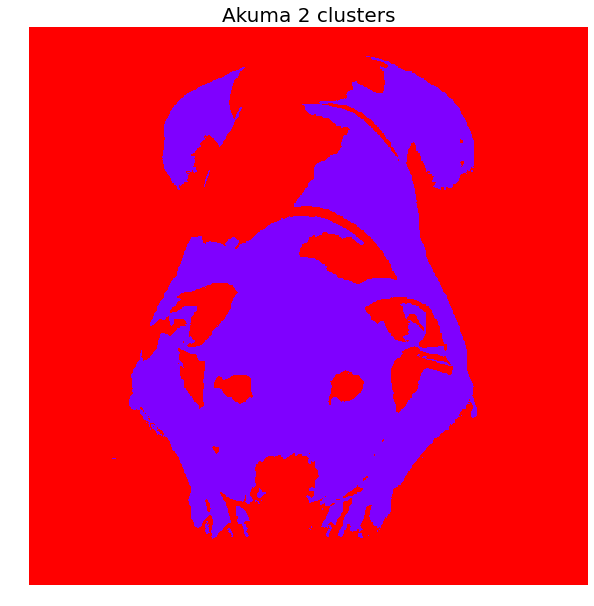

In [3]:
pl.figure(figsize=(10,10))


nc = 2
samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.title("Akuma %d clusters"%nc, fontsize=20)
pl.axis('off')
pl.savefig("ak1.png")

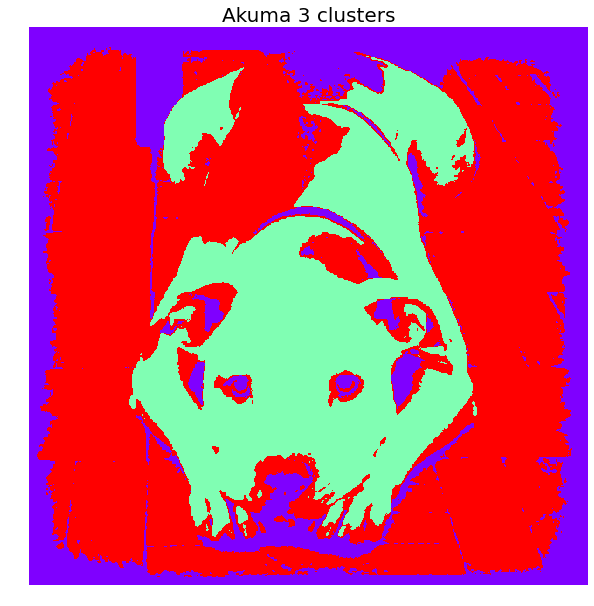

In [4]:
pl.figure(figsize=(10,10))


nc=3
samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.title("Akuma %d clusters"%nc, fontsize=20)
pl.axis('off')
pl.savefig("ak2.png")

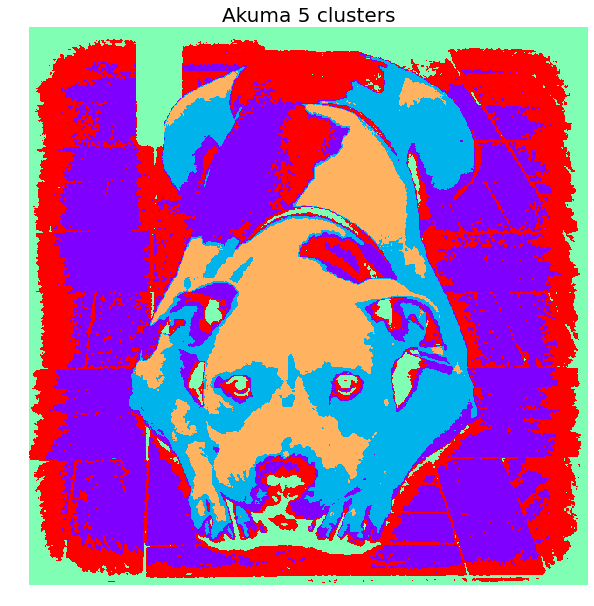

In [5]:
pl.figure(figsize=(10,10))


nc = 5
samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.title("Akuma %d clusters"%nc, fontsize=20)
pl.axis('off')
pl.savefig("ak3.png")

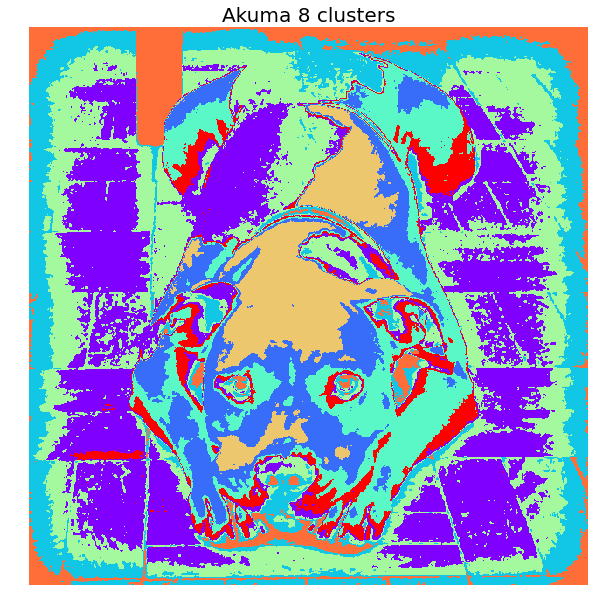

In [6]:
pl.figure(figsize=(10,10))
nc = 8
samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.title("Akuma %d clusters"%nc, fontsize=20)
pl.axis('off')
pl.savefig("ak4.png")


In [6]:
#i am using subprocess to get the size of the files through a command line
#unlike os.system, which also runs command lines, subprocess allows one
#to capture the return output and errors of the command line 
#by piping stdoin, stdout, stderr
#!ls -l ak?.png
#os.system("ls -l ak.png")
from subprocess import Popen
from subprocess import PIPE
localpath = os.getcwd()
for i in range(5):
    p = Popen(['ls', '-lh', localpath+'/ak%d.png'%i], stdin=PIPE, stdout=PIPE, stderr=PIPE)
    output, err = p.communicate(b"size of images")
    print output, err

-rw-r--r--@ 1 fbianco  staff   408K Dec  7 09:57 /Users/fbianco/science/Dropbox/UI/PUI2015/notebooks/cluster/ak0.png

-rw-r--r--@ 1 fbianco  staff    14K Dec  7 09:58 /Users/fbianco/science/Dropbox/UI/PUI2015/notebooks/cluster/ak1.png

-rw-r--r--@ 1 fbianco  staff    24K Dec  7 09:59 /Users/fbianco/science/Dropbox/UI/PUI2015/notebooks/cluster/ak2.png

-rw-r--r--@ 1 fbianco  staff    42K Dec  7 09:59 /Users/fbianco/science/Dropbox/UI/PUI2015/notebooks/cluster/ak3.png

-rw-r--r--@ 1 fbianco  staff    58K Dec  2 14:13 /Users/fbianco/science/Dropbox/UI/PUI2015/notebooks/cluster/ak4.png



## Urban images:  finding windows in the UO images

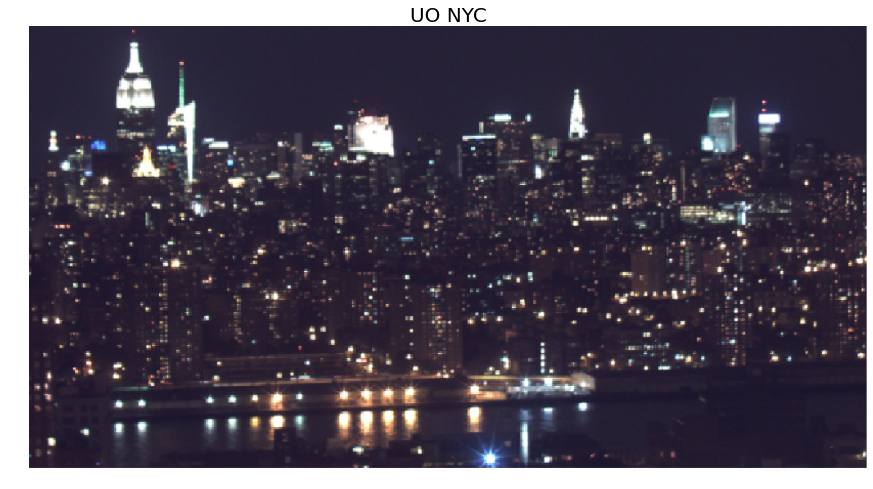

In [7]:
fig = pl.figure(figsize = (15,15))
im = imread("uo_img.jpg")
jpgfile = Image.open("uo_img.jpg")
col, row =  jpgfile.size
m = imread("uo_img.jpg")
pl.imshow(im)
pl.title("UO NYC", fontsize=20)
pl.axis('off')
red = im[:,:,0]
green = im[:,:,1]
blue = im[:,:,2]



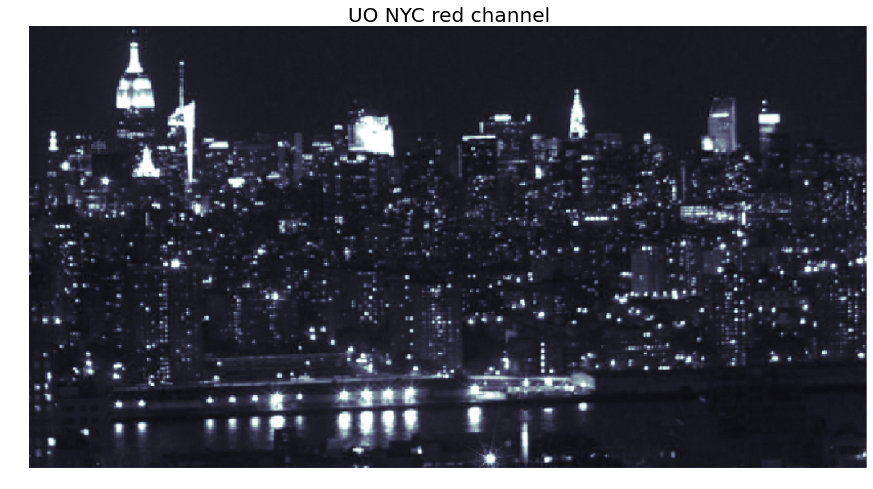

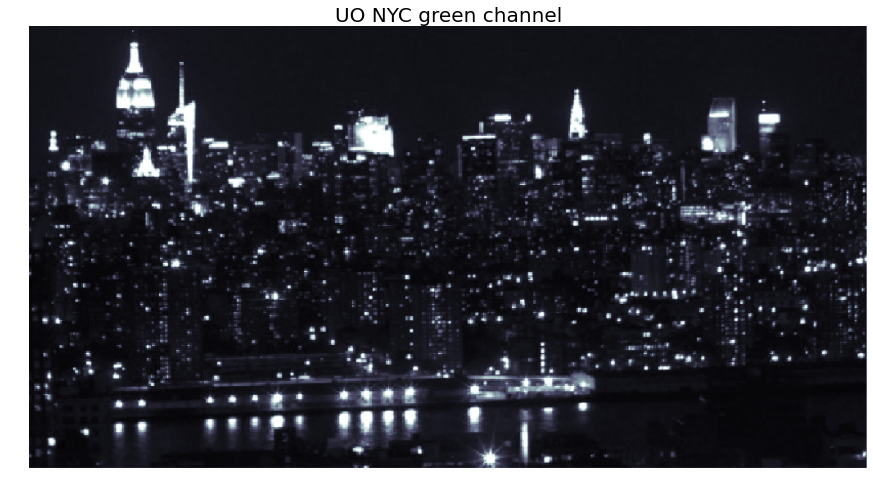

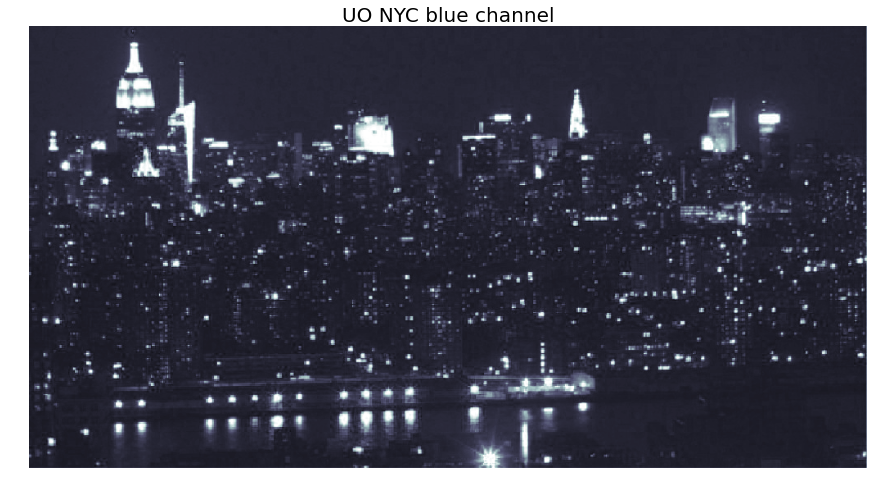

In [8]:
pl.figure(figsize = (15,15))
pl.imshow(red, cmap="bone")
pl.axis('off')
pl.title("UO NYC red channel", fontsize=20)
pl.figure(figsize = (15,15))
pl.imshow(green, cmap="bone")
pl.axis('off')
pl.title("UO NYC green channel", fontsize=20)
pl.figure(figsize = (15,15))
pl.imshow(blue, cmap="bone")
pl.axis('off')
pl.title("UO NYC blue channel", fontsize=20)




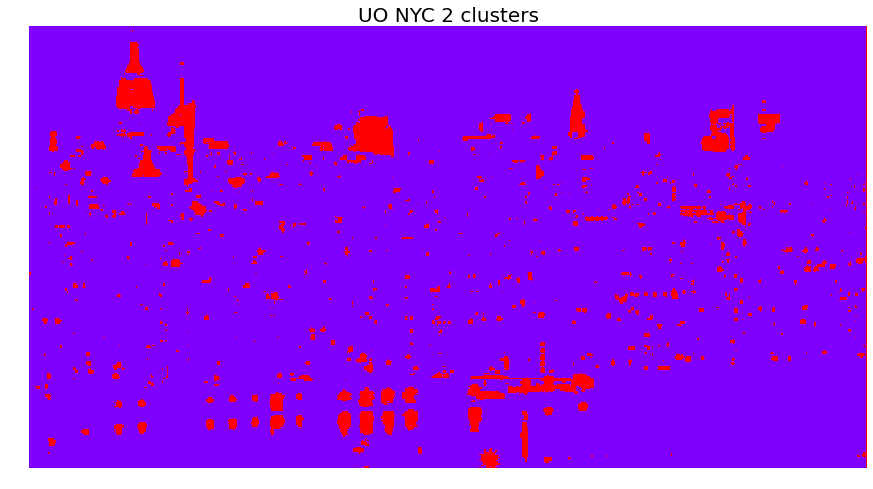

In [10]:

pl.figure(figsize = (15,15))

nc = 2
samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.axis('off')
pl.title("UO NYC %d clusters"%nc, fontsize=20)



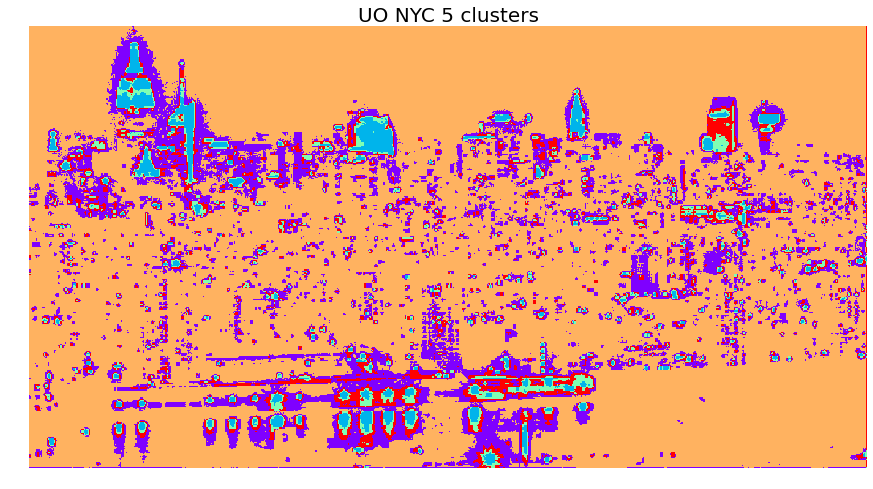

In [12]:
nc = 5
pl.figure(figsize = (15,15))
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)

pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.axis('off')
pl.title("UO NYC %d clusters"%nc, fontsize=20)


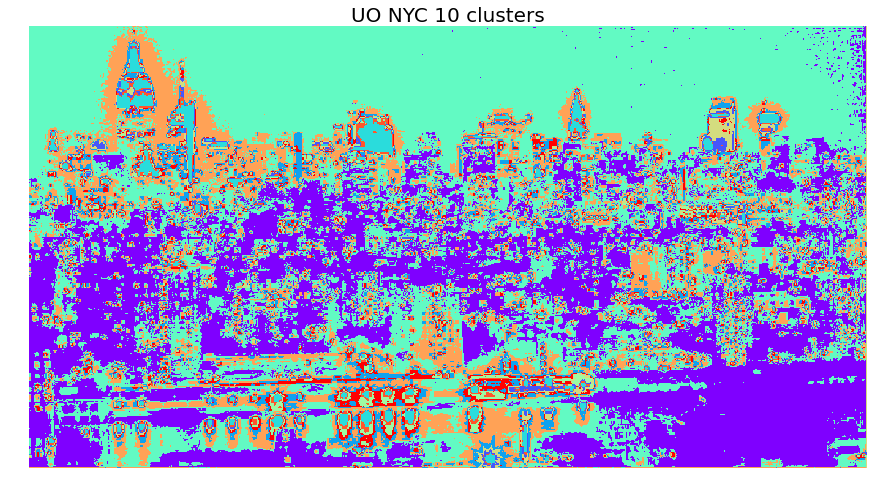

In [12]:
nc = 10
pl.figure(figsize = (15,15))
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.axis('off')
pl.title("UO NYC %d clusters"%nc, fontsize=20)
